In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
train=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv',usecols=[0,3,4])
test=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv',usecols=[0,3])

In [3]:
train.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
test.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7613 non-null   int64 
 1   text    7613 non-null   object
 2   target  7613 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 178.6+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3263 non-null   int64 
 1   text    3263 non-null   object
dtypes: int64(1), object(1)
memory usage: 51.1+ KB


In [7]:
for i in train.columns:
    print(i, train[i].isnull().sum()) 

id 0
text 0
target 0


In [8]:
for i in test.columns:
    print(i, test[i].isnull().sum())

id 0
text 0


In [9]:
x=train['text']
y=train['target']

In [10]:
def clean_text(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    return text

In [11]:
x=x.apply(lambda x: clean_text(x))
test['text']=test['text'].apply(lambda x: clean_text(x))

In [12]:
stop = stopwords.words('english')
x=x.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['text']=test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

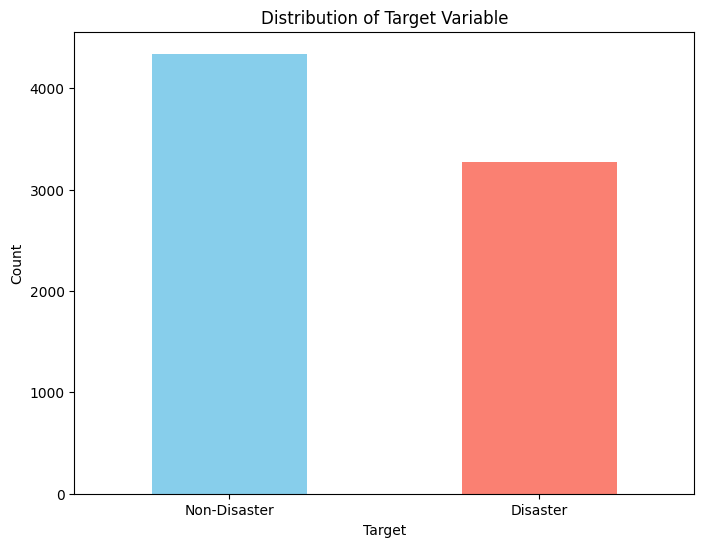

In [13]:
plt.figure(figsize=(8, 6))
train['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Disaster', 'Disaster'], rotation=0)
plt.show()

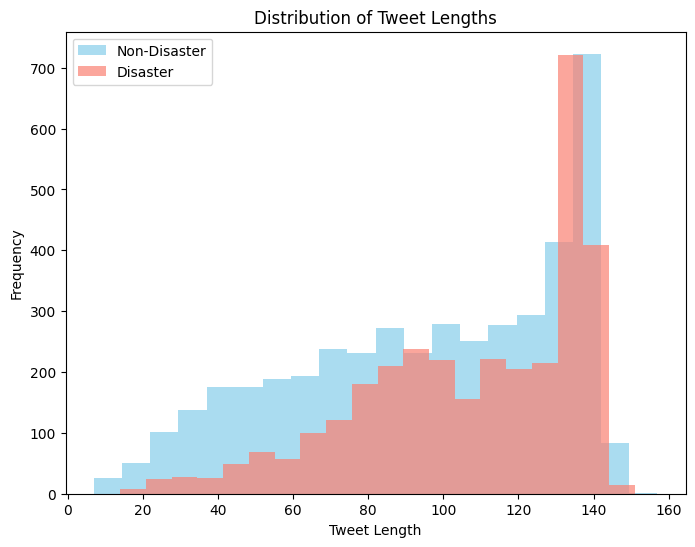

In [14]:
train['tweet_length'] = train['text'].apply(len)
plt.figure(figsize=(8, 6))
plt.hist(train[train['target'] == 0]['tweet_length'], bins=20, color='skyblue', alpha=0.7, label='Non-Disaster')
plt.hist(train[train['target'] == 1]['tweet_length'], bins=20, color='salmon', alpha=0.7, label='Disaster')
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [15]:
disaster_tweets = train[train['target'] == 1]['text'].values
non_disaster_tweets = train[train['target'] == 0]['text'].values

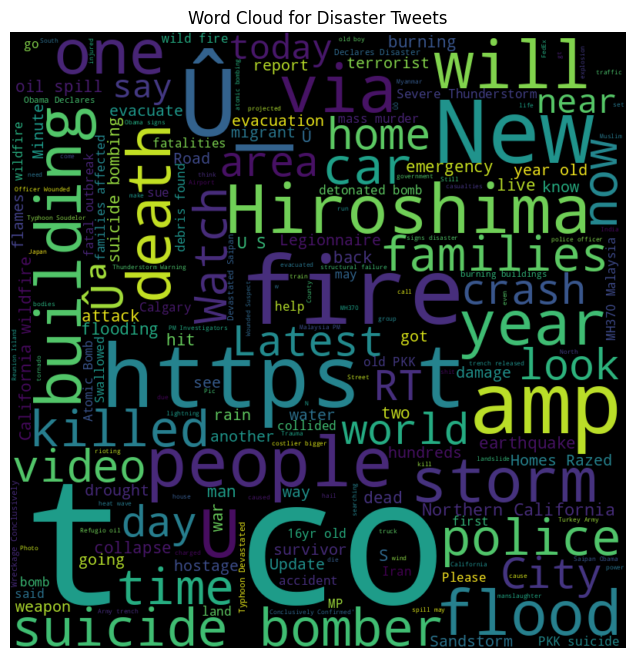

In [16]:
plt.figure(figsize=(10, 8))
wordcloud_disaster = WordCloud(width=800, height=800, background_color='black').generate(" ".join(disaster_tweets))
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.title('Word Cloud for Disaster Tweets')
plt.axis('off')
plt.show()

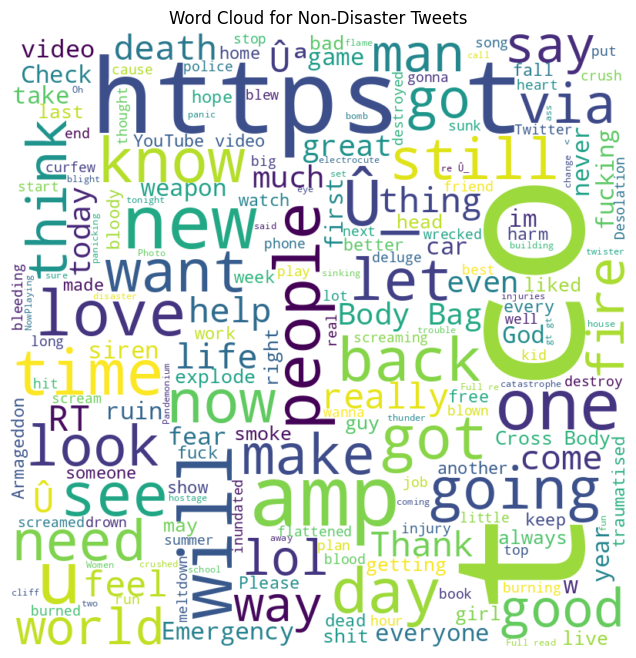

In [17]:
plt.figure(figsize=(10, 8))
wordcloud_non_disaster = WordCloud(width=800, height=800, background_color='white').generate(" ".join(non_disaster_tweets))
plt.imshow(wordcloud_non_disaster, interpolation='bilinear')
plt.title('Word Cloud for Non-Disaster Tweets')
plt.axis('off')
plt.show()

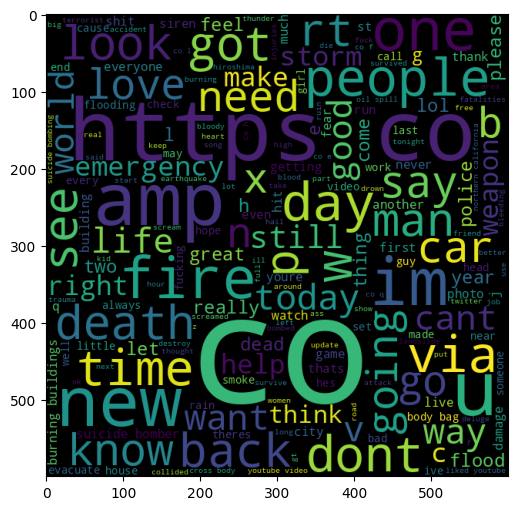

In [18]:
fig, (ax1) = plt.subplots(1, figsize=[6, 6])
wordcloud = WordCloud(background_color='black',width=600,height=600).generate(" ".join(x))
ax1.imshow(wordcloud)

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

In [20]:
c=Pipeline([('count',CountVectorizer(ngram_range=(1,1))),('model',LogisticRegression(C=.8,solver='sag',max_iter=1000))])
c.fit(x_train,y_train)

Pipeline(steps=[('count', CountVectorizer()),
                ('model',
                 LogisticRegression(C=0.8, max_iter=1000, solver='sag'))])

In [21]:
c.score(x_train,y_train)

0.9673234811165846

In [22]:
c.score(x_test,y_test)

0.8174655285620486

In [23]:
y_pred=c.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[768 101]
 [177 477]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       869
           1       0.83      0.73      0.77       654

    accuracy                           0.82      1523
   macro avg       0.82      0.81      0.81      1523
weighted avg       0.82      0.82      0.82      1523



In [24]:
c=Pipeline([('tfidf',TfidfVectorizer(ngram_range=(1,1))),('model',LogisticRegression(C=.8,solver='sag',max_iter=1000))])
c.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model',
                 LogisticRegression(C=0.8, max_iter=1000, solver='sag'))])

In [25]:
print(c.score(x_train,y_train))
print(c.score(x_test,y_test))

0.8830870279146141
0.8023637557452397


In [26]:
y_pred_tfidf=c.predict(x_test)
print(confusion_matrix(y_test,y_pred_tfidf))
print(classification_report(y_test,y_pred_tfidf))

[[765 104]
 [197 457]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       869
           1       0.81      0.70      0.75       654

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [27]:
submission=pd.DataFrame()
submission['id']=test['id']
submission['target']=c.predict(test['text'])
submission.to_csv('submission.csv',index=False)